In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

df = pd.read_csv("result.csv",encoding='cp949')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        366 non-null    int64  
 1   날짜                366 non-null    object 
 2   date              366 non-null    object 
 3   일누적 자외선 A(MJ/m2)  366 non-null    float64
 4   일최대 자외선 B(W/m2 )  366 non-null    float64
 5   평균 오존전량(DU)       366 non-null    float64
 6   전운량(10분위)         366 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB
None


In [3]:
z = df['일최대 자외선 B(W/m2 )']*df['평균 오존전량(DU)']

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='일누적 자외선 A(MJ/m2)', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='전운량(10분위)', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='일누적 자외선 A(MJ/m2)', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='일누적 자외선 A(MJ/m2)'>,
        <AxesSubplot:xlabel='전운량(10분위)', ylabel='일누적 자외선 A(MJ/m2)'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='일누적 자외선 A(MJ/m2)', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='일최대 자외선 B(W/m2 )'>,
        <Ax

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

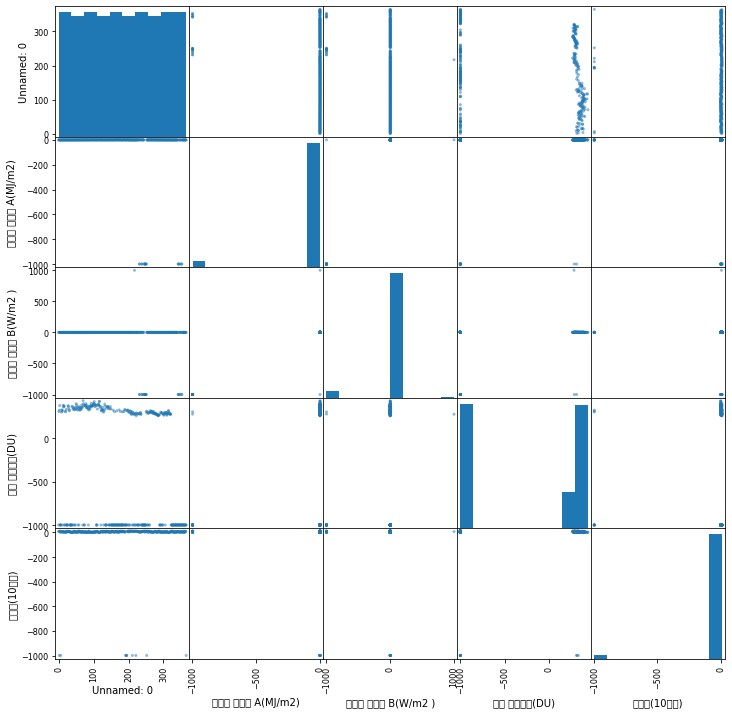

In [4]:
import matplotlib.pylab as plt

pd.plotting.scatter_matrix(df,figsize=(12,12), hist_kwds={'bins':10})

<AxesSubplot:ylabel='Frequency'>

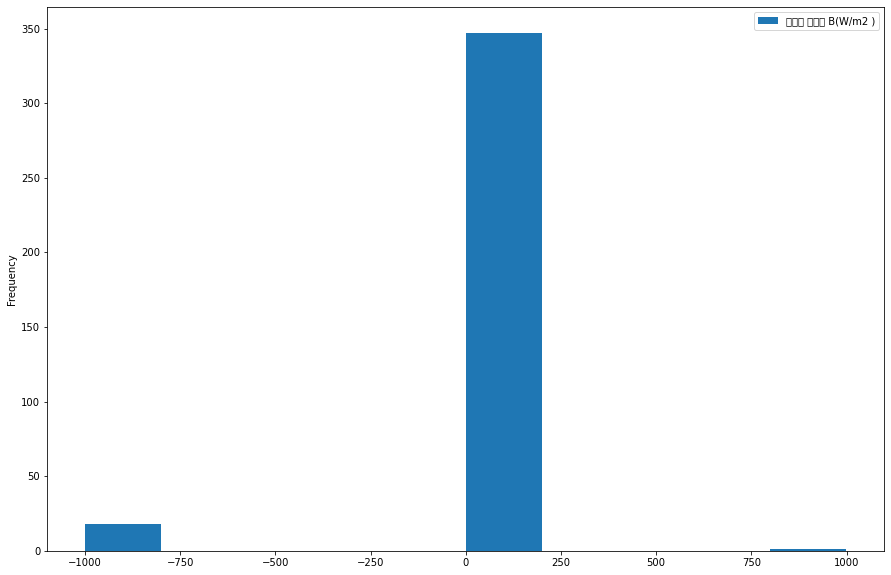

In [5]:
df.plot(kind='hist', x = '평균 오존전량(DU)' , y='일최대 자외선 B(W/m2 )', figsize=(15,10))

In [22]:

#결측값 평균값 대체
df = df.replace(-999, np.NaN)
df.loc[df['평균 오존전량(DU)'] != df['평균 오존전량(DU)'], '평균 오존전량(DU)'] = df['평균 오존전량(DU)'].mean()

za=df[['일최대 자외선 B(W/m2 )']]
ozon=df[['평균 오존전량(DU)']]


In [23]:
import statsmodels.api as sm   
ozon1 = sm.add_constant(ozon, has_constant = "add")  #상수항 추가
model1 = sm.OLS(za, ozon1)
fitted_model1 = model1.fit()


C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
fitted_model1.summary()
#결과해석 
#r-squared 이 0.03로 설명력이 크지않다는것을 알 수있고 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       일최대 자외선 B(W/m2 )   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                nan
Time:                        16:04:56   Log-Likelihood:                    nan
No. Observations:                 366   AIC:                               nan
Df Residuals:                     364   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const              nan        nan        nan        nan         nan         nan
평균 오존전량(DU)        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     3.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
fitted_model1.params    #회귀계수출력

const         NaN
평균 오존전량(DU)   NaN
dtype: float64

In [26]:
pred0 = np.dot(ozon1, fitted_model1.params) #y hat 적합값(예측값) 계산

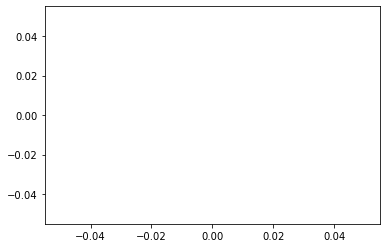

In [27]:
plt.scatter(za, pred0)

In [4]:
#결측값제거 
df = pd.read_csv("result.csv",encoding='cp949')
df = df.replace(-999, np.NaN)


In [5]:
df.head(10)

,Unnamed: 0,날짜,date,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위)
0,0,2020-01-01,2020-01-01,0.312,0.045,NaN,8.0
1,1,2020-01-02,2020-01-02,0.214,0.030,308.5,9.0
2,2,2020-01-03,2020-01-03,0.383,0.041,325.0,NaN
3,3,2020-01-04,2020-01-04,0.351,0.032,377.0,8.0
4,4,2020-01-05,2020-01-05,0.416,0.047,NaN,0.0
5,5,2020-01-06,2020-01-06,0.112,0.014,NaN,10.0
6,6,2020-01-07,2020-01-07,0.054,0.011,NaN,NaN
7,7,2020-01-08,2020-01-08,0.060,0.011,NaN,10.0
8,8,2020-01-09,2020-01-09,0.424,0.050,301.5,6.0
9,9,2020-01-10,2020-01-10,0.448,0.047,327.5,0.0


In [6]:
df_drop_row = df.dropna(axis=0)
df_drop_row

,Unnamed: 0,날짜,date,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),전운량(10분위)
1,1,2020-01-02,2020-01-02,0.214,0.030,308.5,9.0
3,3,2020-01-04,2020-01-04,0.351,0.032,377.0,8.0
8,8,2020-01-09,2020-01-09,0.424,0.050,301.5,6.0
9,9,2020-01-10,2020-01-10,0.448,0.047,327.5,0.0
10,10,2020-01-11,2020-01-11,0.430,0.045,324.6,5.0
...,...,...,...,...,...,...,...
317,317,2020-11-13,2020-11-13,0.480,0.070,286.0,3.0
318,318,2020-11-14,2020-11-14,0.489,0.075,280.7,0.0
319,319,2020-11-15,2020-11-15,0.505,0.077,276.1,1.0
320,320,2020-11-16,2020-11-16,0.435,0.069,282.8,7.0


In [7]:
za=df_drop_row[['일최대 자외선 B(W/m2 )']]
ozon=df_drop_row[['평균 오존전량(DU)']]

In [8]:
import statsmodels.api as sm   #결측값 제거후 선형회귀
ozon1 = sm.add_constant(ozon, has_constant = "add")  #상수항 추가
model1 = sm.OLS(za, ozon1)
fitted_model1 = model1.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
fitted_model1.summary()
#결과해석 
#r-squared 이 0.087로 설명력이 크지않다는것을 알 수있고 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       일최대 자외선 B(W/m2 )   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.556
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.214
Time:                        17:52:44   Log-Likelihood:                -1139.2
No. Observations:                 201   AIC:                             2282.
Df Residuals:                     199   BIC:                             2289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.0014     40.317      1.364      0.174     -24.503     134.506
평균 오존전량(DU)    -0.1520      0.122     -1.247      0.214      -0.392       0.088
==============================================================================
Omnibus:                      443.721   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           318242.818
Skew:                          13.907   Prob(JB):                         0.00
Kurtosis:                     195.939   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
pred0 = np.dot(ozon1, fitted_model1.params) #y hat 적합값(예측값) 계산

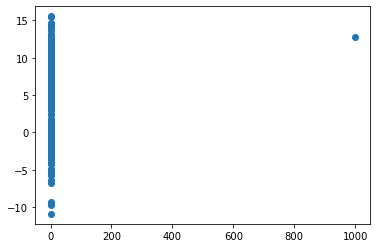

In [11]:
plt.scatter(za, pred0)

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


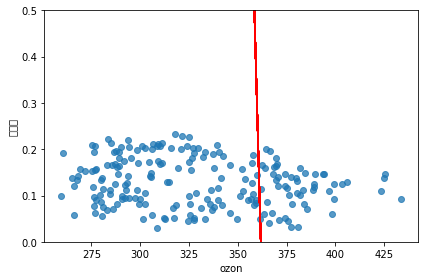

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
자외선 = df_drop_row['일최대 자외선 B(W/m2 )']
오존 = df_drop_row['평균 오존전량(DU)']

plt.scatter(오존, 자외선 ,alpha=0.75)

plt.ylabel('자외선')
plt.xlabel('ozon')
plt.ylim([0, 0.5])

line_fitter = LinearRegression()
line_fitter.fit(오존.values.reshape(-1,1), 자외선)
plt.plot(오존,line_fitter.predict(오존.values.reshape(-1,1)),'r')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
 
data = pd.read_csv("자외선지수.csv", encoding='euc-kr')
 
날짜 = data['일시']
오존 = data['평균 오존전량(DU)']

plt.scatter(날짜, 오존,alpha=0.75)

plt.xlabel('date')
plt.ylabel('ozon')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()
#log 선형회귀도 방법임

In [47]:
#시그모이드함수적용
#https://woolulu.tistory.com/95 참고 
import csv

ozon_data = []

with open('자외선지수.csv', newline='') as csvfile:

    csv_reader = csv.reader(csvfile)

    ozon_header = next(csv_reader)

    ozon_data = [[float(args) for args in row] for row in csv_reader]

    ozon_data = np.array(ozon_data)

ValueError: could not convert string to float: '안면도(감)'